## Rendimento Casa/Fuori Casa

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text
import matplotlib.patheffects as path_effects
from PIL import Image
import urllib
import os
import matplotlib.font_manager as fm

In [17]:
font_path = "../Grafici/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")

In [18]:

df = pd.read_csv('fbref_data.csv', sep=',')
df.set_index('Squad')

,Casa,Fuori
Squad,,
Napoli,39,44
Juventus,42,27
Inter,39,27
Lazio,34,31
Milan,37,24
Roma,32,27
Atalanta,27,31
Fiorentina,30,19
Monza,26,23


In [19]:
def calc_diff(data):
    diffs = pd.Series(index=data.index, name='Diff', dtype=float)
    for x in data.itertuples():
        diffs.loc[x.Index] = (x.Casa-x.Fuori)
    return data.merge(diffs, right_index=True, left_index=True).set_index('Squad')
df_sum = calc_diff(df)
df_sum

,Casa,Fuori,Diff
Squad,,,
Napoli,39,44,-5.0
Juventus,42,27,15.0
Inter,39,27,12.0
Lazio,34,31,3.0
Milan,37,24,13.0
Roma,32,27,5.0
Atalanta,27,31,-4.0
Fiorentina,30,19,11.0
Monza,26,23,3.0


In [37]:
def calc_percent(data):
    df = pd.DataFrame(index=data.index, columns=['Casa', 'Fuori', 'Diff'])
    for x in data.itertuples():
        tot = x.Casa + x.Fuori
        df.loc[x.Index].Casa = x.Casa / tot 
        df.loc[x.Index].Fuori = x.Fuori / tot
        df.loc[x.Index].Diff = x.Diff / tot
    return df
#calc_percent(df_sum).sort_values(by='Diff')[['Casa', 'Fuori']].plot.barh(stacked=True)
calc_percent(df_sum)

,Casa,Fuori,Diff
Squad,,,
Napoli,0.46988,0.53012,-0.060241
Juventus,0.608696,0.391304,0.217391
Inter,0.590909,0.409091,0.181818
Lazio,0.523077,0.476923,0.046154
Milan,0.606557,0.393443,0.213115
Roma,0.542373,0.457627,0.084746
Atalanta,0.465517,0.534483,-0.068966
Fiorentina,0.612245,0.387755,0.22449
Monza,0.530612,0.469388,0.061224


In [21]:
#df_sum['Diff'].sort_values().plot.barh()

In [45]:
team_map = {
    'Squad': [
        "Napoli",
        "Lazio",
        "Juventus",
        "Inter",
        "Atalanta",
        "Milan",
        "Roma",
        "Fiorentina",
        "Bologna",
        "Monza",
        "Torino",
        "Sassuolo",
        "Udinese",
        "Salernitana",
        "Empoli",
        "Lecce",
        "Hellas Verona",
        "Spezia",
        "Cremonese",
        "Sampdoria"
    ],
    'fotmob_id':[
        9875,
        8543,
        9885,
        8636,
        8524,
        8564,
        8686,
        8535,
        9857,
        6504,
        9804,
        7943,
        8600,
        6480,
        8534,
        9888,
        9876,
        9881,
        7801,
        9882
    ],
}

team_map = pd.DataFrame(team_map['fotmob_id'], index=team_map['Squad'], columns=['id'])

In [70]:
color_casa = "#FFB000" 
color_fuori = "#785EF0"

In [75]:
def plot(ax, fig, df):

    data = calc_percent(df).sort_values(by='Diff')
    width = 0.7
    width_bar = 0.35

    ax.barh(
        data.index, 
        data.Casa, 
        ec = "black", 
        lw = .75, 
        color = color_casa, 
        zorder = 3, 
        height = 0.75,
        label = "Punti in casa"
    )

    ax.barh(
        data.index, 
        data.Fuori, 
        left = data.Casa,
        ec = "black", 
        lw = .75, 
        color = color_fuori, 
        zorder = 3, 
        height = 0.75,
        label = "Punti fuori casa"
    )
    
    ax.legend(
        ncol = 2, 
        #loc = "center right", 
        bbox_to_anchor = (0.4, 1),
        frameon = False,
        fontsize = 15
    )
    
    # Annotate the bar charts
    x_h = data.Casa.min()
    x_a = data.Fuori.min()
    
    for c in range(0, len(data)):

        home_text = ax.annotate(
            xy = (x_h/2, c),
            text = f"{df.Casa.iloc[c]}", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        away_text = ax.annotate(
            xy = (1 - x_a/2, c),
            text = f"{df.Fuori.iloc[c]}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )
  
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
    ax.set_xlim(0, 1)
    ax.spines["top"].set(visible = False)
    ax.xaxis.set_ticks(np.linspace(0, 1, num=21))
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x: .0%}")
    yticks_ = ax.yaxis.set_ticks(
        ticks = [],
        labels = []
    )
   
    # starting form .815 -> x-0.035
    
    y = 0.815
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for i in range(0, len(data)):
        logo_ax = fig.add_axes([0.1, y, 0.03, 0.03], anchor = "W")
        y = round(y -0.0355, 6)
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_map.loc[data.iloc[i].name].id:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    


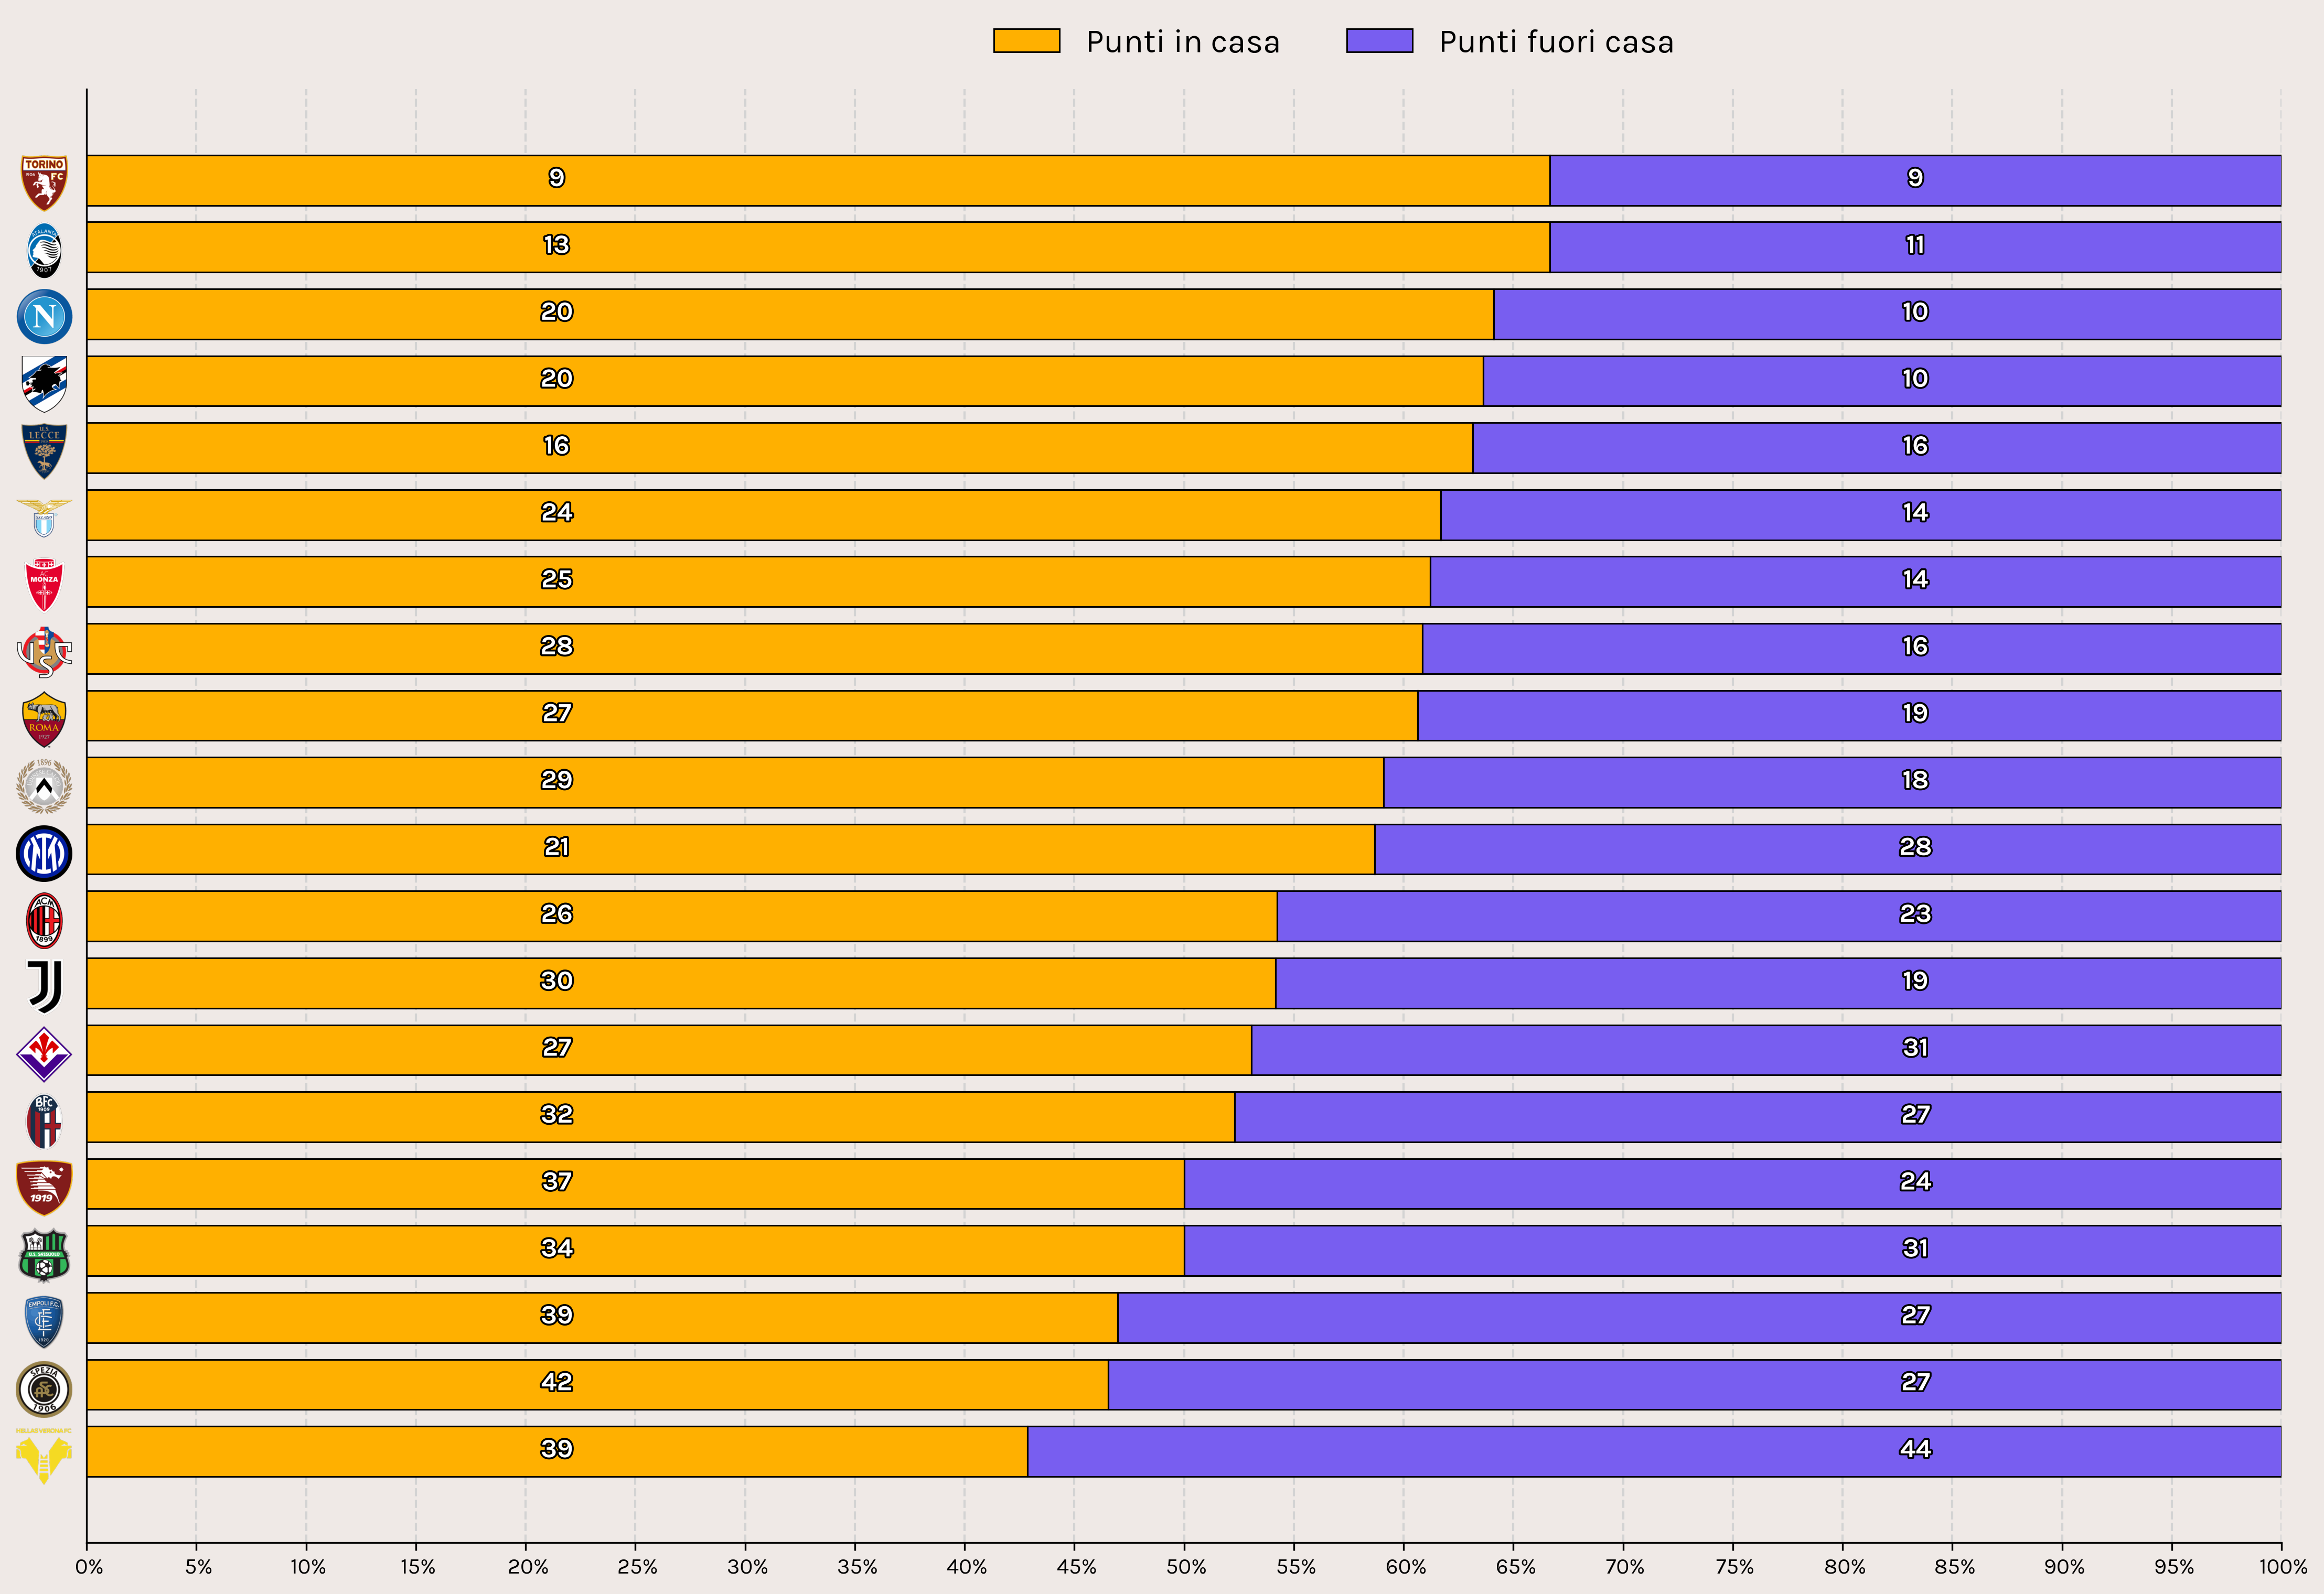

In [76]:
fig = plt.figure(figsize=(18, 12), dpi=300)
ax = plt.subplot()
plot(ax, fig, df_sum)
plt.savefig(
    "../Grafici/figures/Rendimento_Casa-Fuori.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "../Grafici/figures/Rendimento_Casa-Fuori_tr.png",
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)

In [73]:
def plot_emp(ax, fig, df):

    data = calc_percent(df).sort_values(by='Diff')
    width = 0.7
    width_bar = 0.35

    ax.barh(
        df.index, 
        df.Casa, 
        ec = "black", 
        lw = .75, 
        color = color_casa, 
        zorder = 3, 
        height = 0.75,
        label = "Punti in casa"
    )

    ax.barh(
        df.index, 
        df.Fuori, 
        left = df.Casa,
        ec = "black", 
        lw = .75, 
        color = color_fuori, 
        zorder = 3, 
        height = 0.75,
        label = "Punti fuori casa"
    )
    
    ax.legend(
        ncol = 2, 
        #loc = "center right", 
        bbox_to_anchor = (0.4, 1),
        frameon = False,
        fontsize = 15
    )
    
    # Annotate the bar charts

    
    for c in range(0, len(data)):
        x_h = df.iloc[c].Casa
        x_a = df.iloc[c].Fuori
        home_text = ax.annotate(
            xy = (x_h/2, c),
            text = f"{data.Casa.iloc[c]: .0%}", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        away_text = ax.annotate(
            xy = (x_h+x_a - x_a/2, c),
            text = f"{data.Fuori.iloc[c]: .0%}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )
  
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
    #ax.set_xlim(0, 1)
    ax.spines["top"].set(visible = False)
    #ax.xaxis.set_ticks(np.linspace(0, 1, num=21))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{x*100: .0f}%")
    yticks_ = ax.yaxis.set_ticks(
        ticks = [],
        labels = []
    )
   
    # starting form .815 -> x-0.035
    
    y = 0.815
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for i in range(0, len(data)):
        logo_ax = fig.add_axes([0.1, y, 0.03, 0.03], anchor = "W")
        y = round(y -0.0355, 6)
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_map.loc[data.iloc[i].name].id:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    

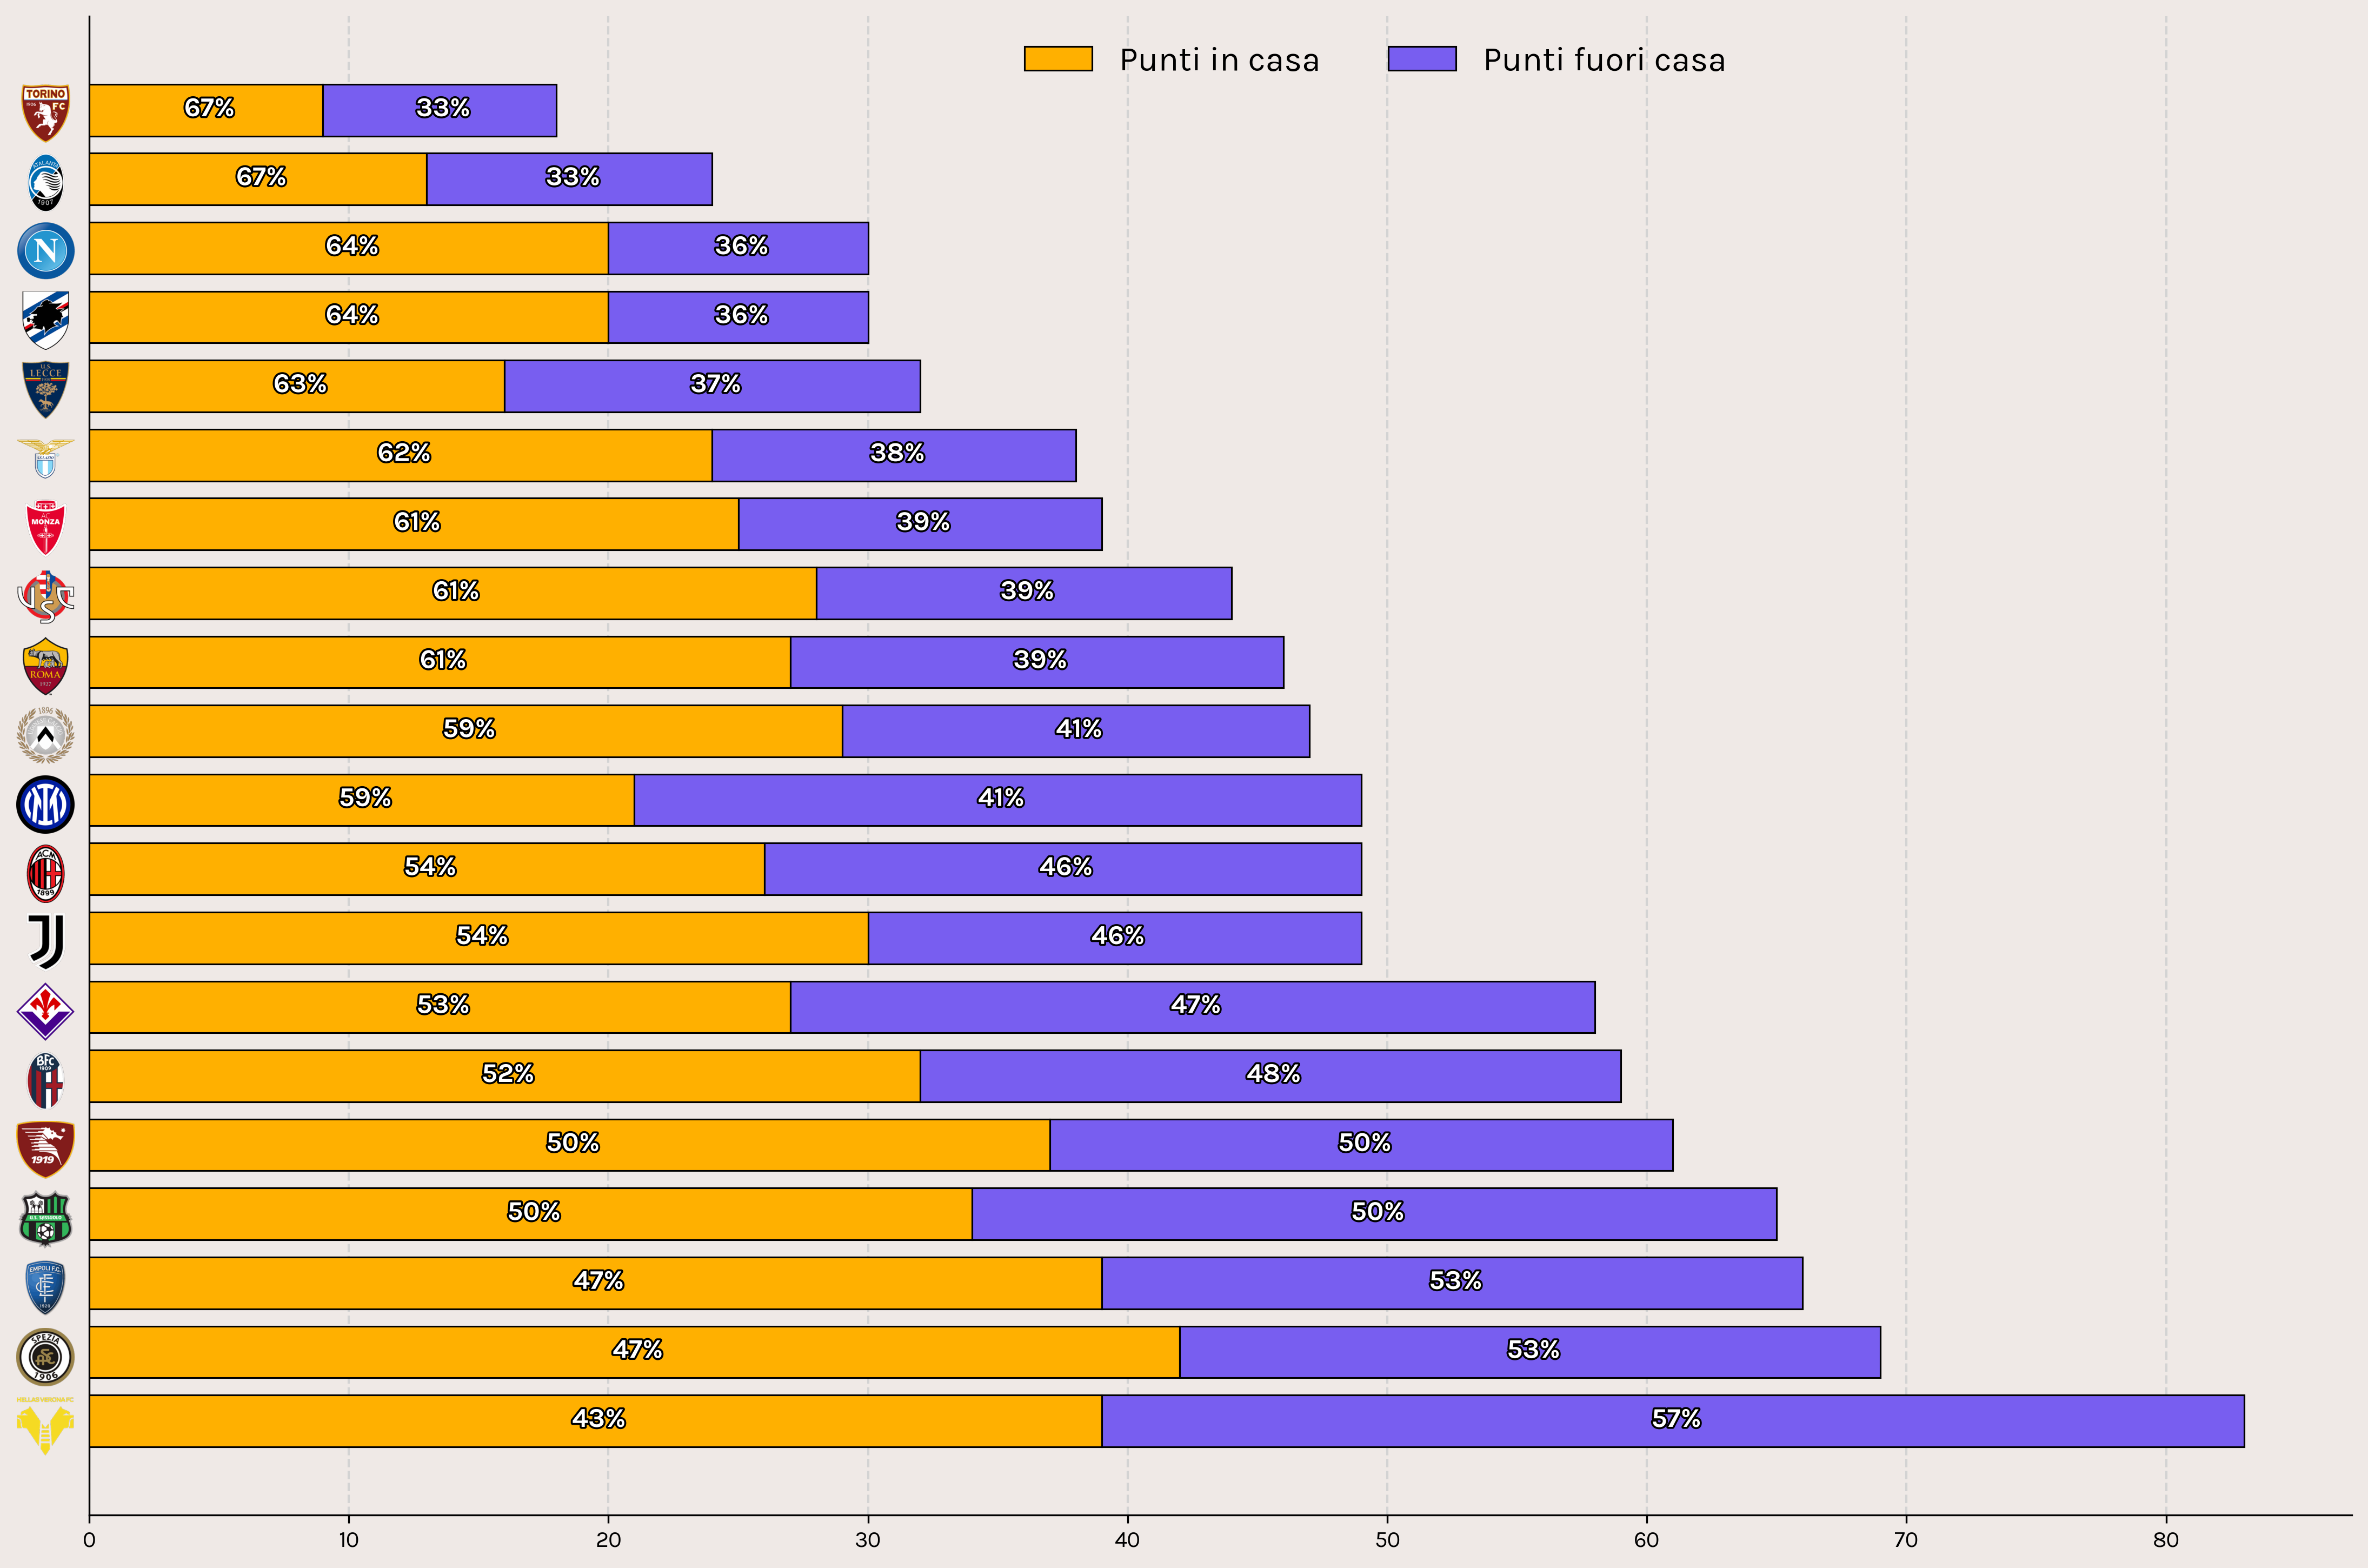

In [74]:
fig = plt.figure(figsize=(18, 12), dpi=300)
ax = plt.subplot()
plot_emp(ax, fig, df_sum)
plt.savefig(
    "../Grafici/figures/Rendimento_Casa-Fuori_rev.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "../Grafici/figures/Rendimento_Casa-Fuori_tr_rev.png",
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)